In [1]:
from IPython.display import display
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

def visualize(texts, features, document_feature_frequencies):
    m = pd.DataFrame(columns=['text']+features)
    for text_index, text in enumerate(texts):
        row = {'text': text}
        for feature_index, feature in enumerate(features):
            row[feature] = document_feature_frequencies[text_index, feature_index]
        m = m.append(row, ignore_index=True)
    
    plt.figure(figsize=(12, 3))
    plt.title('Documents vs. feature weights')
    sns.heatmap(
        m[features].astype('float'), 
        annot=True,
        linewidths=.5, 
        cmap='Oranges', 
        yticklabels=m['text'])
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
    
    from sklearn.metrics.pairwise import cosine_similarity
    
    document_similarities = cosine_similarity(document_feature_frequencies, document_feature_frequencies)
    plt.figure(figsize=(12, 3))
    plt.title('Document similarities')
    sns.heatmap(
        document_similarities, 
        annot=True,
        linewidths=.5, 
        cmap='Oranges', 
        xticklabels=m['text'], 
        yticklabels=m['text'])
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()
    
    feature_document_frequencies = np.transpose(document_feature_frequencies)
    feature_similarities = cosine_similarity(feature_document_frequencies, feature_document_frequencies)
    plt.figure(figsize=(12, 6))
    plt.title('Feature similarities')
    sns.heatmap(
        feature_similarities, 
        annot=True,
        linewidths=.5, 
        cmap='Oranges', 
        xticklabels=features, 
        yticklabels=features)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

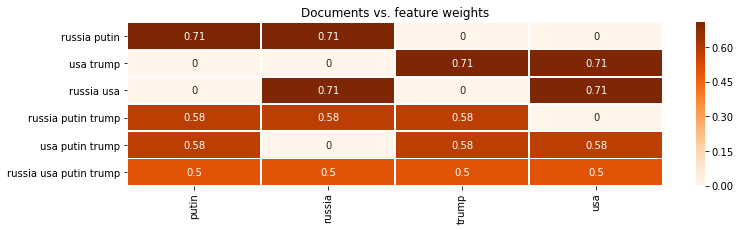

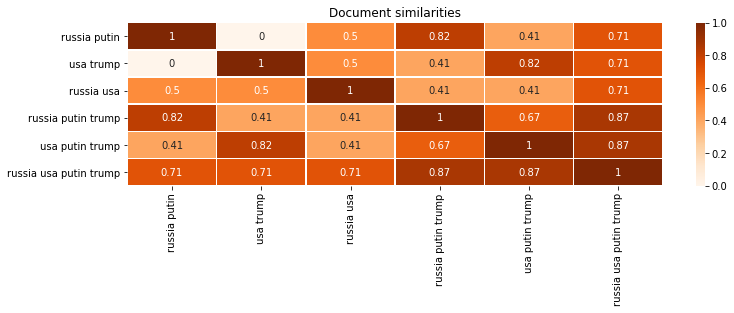

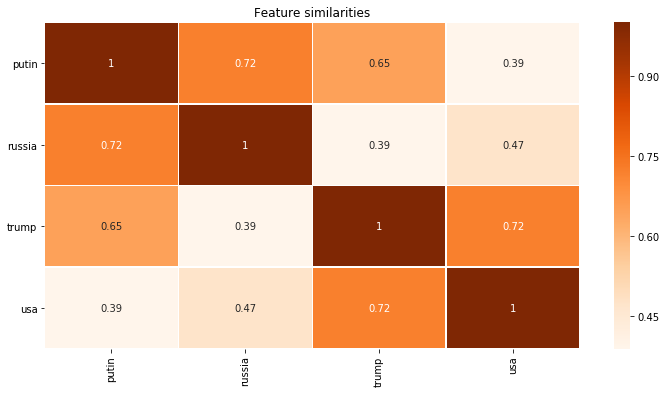

In [2]:
documents = pd.DataFrame([
    {'text': 'russia putin', 'category': 'russia'},
    {'text': 'usa trump', 'category': 'usa'},
    {'text': 'russia usa', 'category': 'world'},
    {'text': 'russia putin trump', 'category': 'world'},
    {'text': 'usa putin trump', 'category': 'world'},
    {'text': 'russia usa putin trump', 'category': 'world'}
])

tfidf_vectorizer = TfidfVectorizer()
frequencies = tfidf_vectorizer.fit_transform(documents['text'])
features = tfidf_vectorizer.get_feature_names()
visualize(documents['text'], features, frequencies)

In [3]:
from sklearn.preprocessing import LabelEncoder
category_encoder = LabelEncoder()
category_encoder.fit(documents['category'].unique().tolist())
encoded_categories = category_encoder.transform(documents['category'])

from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(
    frequencies.toarray(), 
    encoded_categories)

predicted_encoded_categories = naive_bayes.predict(frequencies.toarray())

predicted_decoded_categories = category_encoder.inverse_transform(predicted_encoded_categories)
print(predicted_decoded_categories)
print(naive_bayes.predict_log_proba(frequencies.toarray()))
print(naive_bayes.predict_proba(frequencies.toarray()))

['russia' 'usa' 'world' 'world' 'world' 'world']
[[ 0.00000000e+00 -1.09352371e+10 -4.34397864e+01]
 [-1.09352371e+10  0.00000000e+00 -4.34397864e+01]
 [-5.46761853e+09 -5.46761853e+09  0.00000000e+00]
 [-2.00665336e+09 -6.47094524e+09  0.00000000e+00]
 [-6.47094524e+09 -2.00665336e+09  0.00000000e+00]
 [-3.20285677e+09 -3.20285677e+09  0.00000000e+00]]
[[1.00000000e+00 0.00000000e+00 1.36251241e-19]
 [0.00000000e+00 1.00000000e+00 1.36251241e-19]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


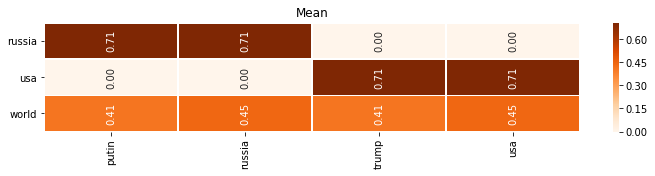

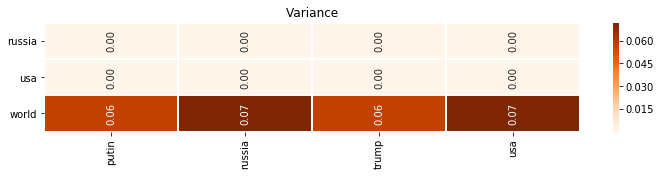

In [4]:
plt.figure(figsize=(12, 2))
plt.title('Mean')
sns.heatmap(
    naive_bayes.theta_, 
    annot=True,
    annot_kws={'rotation': 90},
    fmt='.2f',
    linewidths=.5, 
    cmap='Oranges', 
    xticklabels=features,
    yticklabels=category_encoder.classes_)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

plt.figure(figsize=(12, 2))
plt.title('Variance')
sns.heatmap(
    naive_bayes.sigma_, 
    annot=True,
    annot_kws={'rotation': 90},
    fmt='.2f',
    linewidths=.5, 
    cmap='Oranges', 
    xticklabels=features,
    yticklabels=category_encoder.classes_)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()